✅ Autenticação feita com sucesso! Continue para coletar os dados...
✅ Dados recebidos com sucesso!


,data,apartamento,comentario,obs,analista,data_resolucao
0,13/03/2025,APT139,Não recomendo.,Comentário Respondido,Janine Freitas,22/03/2025
1,13/03/2025,APT111,Uma estadia agradável.,Comentário Respondido,Ana Carol,14/03/2025
2,13/03/2025,APT127,Uma experiência verdadeiramente excepcional.,Comentário Respondido,Carol,19/03/2025
3,13/03/2025,APT125,"Voltaria com certeza, recomendo a todos.",Comentário Encaminhado,Ana Carol,16/03/2025
4,13/03/2025,APT102,Decepção total.,Comentário Respondido,Ana Carolina,22/03/2025



📊 Distribuição de Categorias:
categoria
Outros            113
Recomendação       21
Preço               7
Limpeza             6
Infraestrutura      4
Name: count, dtype: int64

⏱️ Tempo médio de resolução (em dias):
5.79

📋 Tempo médio por analista:
analista
Ana Carol         4.88
Ana Carolina      6.41
Ana Santos        6.06
Carol             5.42
Janine            5.80
Janine F.         5.87
Janine Freitas    6.27
Name: dias_para_resolver, dtype: float64


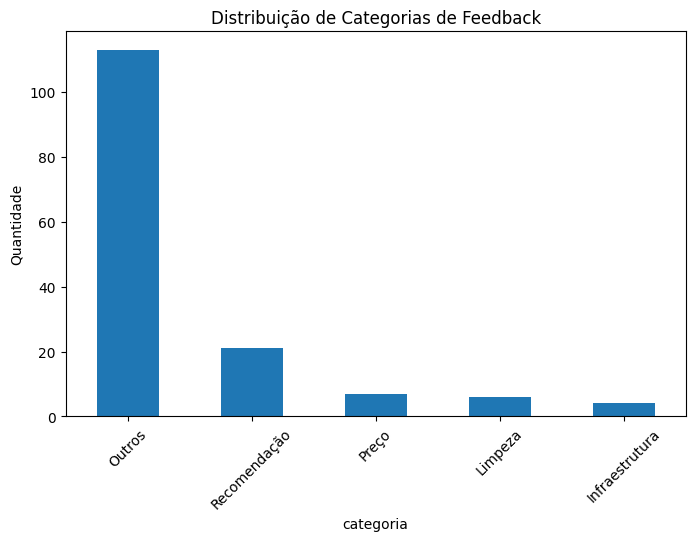

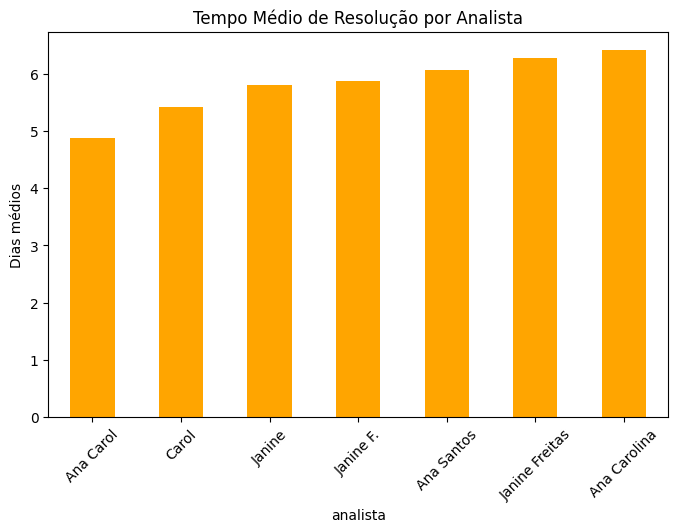

✅ Planilha 'Feedbacks_Analisados_API' criada com sucesso!
Acesse em: https://docs.google.com/spreadsheets/d/1aDHp_UCqA7CfDraV5qPIDSb0GOsp8GONYyUTDP4Bcps

💡 INSIGHTS AUTOMÁTICOS
- O tempo médio de resolução está alto. Sugere-se rever o fluxo de atendimento.
- O tema mais recorrente é 'Outros', indicando foco de melhoria.
- Sugere-se um sistema de priorização e alertas automáticos para comentários sem resposta.


In [ ]:
# ==============================================
# 📊 Projeto: Análise de Feedbacks de Estadias
# Fonte: API Google Apps Script
# Autor: Misllen Silva
# ==============================================

# --- Instalar dependências ---
!pip install gspread gspread_dataframe requests pandas matplotlib

# --- Importar bibliotecas ---
import requests
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import auth
import gspread
from gspread_dataframe import set_with_dataframe
from google.auth import default

# ==============================================
#  AUTENTICAÇÃO NO GOOGLE
# ==============================================
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

print("✅ Autenticação feita com sucesso! Continue para coletar os dados...")

# ==============================================
#  COLETA DE DADOS VIA API
# ==============================================
url = "https://script.google.com/macros/s/AKfycbz6lbNDRjwV_W_Ft_t-pISctlSUNUfUNYQDUYdcivVlch0WTi-dgRSuChtAL_pJwbw/exec"

params = {
    "rota": "comentarios",
    "start_date": "01/03/2025",  # 🔹 altere as datas conforme necessário
    "end_date": "31/03/2025"
}

response = requests.get(url, params=params)

if response.status_code != 200:
    print("❌ Erro ao acessar a API:", response.status_code)
else:
    data = response.json()
    df = pd.DataFrame(data)
    print("✅ Dados recebidos com sucesso!")
    display(df.head())

# ==============================================
#  TRATAMENTO DOS DADOS
# ==============================================
df["data"] = pd.to_datetime(df["data"], format="%d/%m/%Y", errors="coerce")
df["data_resolucao"] = pd.to_datetime(df["data_resolucao"], format="%d/%m/%Y", errors="coerce")

df["dias_para_resolver"] = (df["data_resolucao"] - df["data"]).dt.days

# ==============================================
#  CATEGORIZAÇÃO AUTOMÁTICA DOS COMENTÁRIOS
# ==============================================
def categorizar(comentario):
    comentario = str(comentario).lower()
    if any(p in comentario for p in ["sujo", "limpeza", "cheiro", "toalha", "roupa de cama"]):
        return "Limpeza"
    elif any(p in comentario for p in ["atendimento", "suporte", "demora", "retorno", "funcionário"]):
        return "Atendimento"
    elif any(p in comentario for p in ["internet", "chuveiro", "barulho", "ar-condicionado", "wifi"]):
        return "Infraestrutura"
    elif any(p in comentario for p in ["caro", "preço", "valor", "custo"]):
        return "Preço"
    elif any(p in comentario for p in ["recomendo", "voltaria", "ótimo", "excelente"]):
        return "Recomendação"
    else:
        return "Outros"

df["categoria"] = df["comentario"].apply(categorizar)

# ==============================================
#  ANÁLISES E INSIGHTS
# ==============================================
print("\n📊 Distribuição de Categorias:")
print(df["categoria"].value_counts())

print("\n⏱️ Tempo médio de resolução (em dias):")
print(round(df["dias_para_resolver"].mean(), 2))

print("\n📋 Tempo médio por analista:")
print(df.groupby("analista")["dias_para_resolver"].mean().round(2))

# --- Visualizações ---
plt.figure(figsize=(8,5))
df["categoria"].value_counts().plot(kind="bar", title="Distribuição de Categorias de Feedback", rot=45)
plt.ylabel("Quantidade")
plt.show()

plt.figure(figsize=(8,5))
df.groupby("analista")["dias_para_resolver"].mean().sort_values().plot(kind="bar", color="orange", title="Tempo Médio de Resolução por Analista", rot=45)
plt.ylabel("Dias médios")
plt.show()

# ==============================================
#  EXPORTAÇÃO PARA GOOGLE SHEETS
# ==============================================
nome_planilha = "Feedbacks_Analisados_API"

# Cria uma nova planilha no seu Google Drive
sh = gc.create(nome_planilha)

#  e-mail Google
sh.share('miliabreu01@gmail.com', perm_type='user', role='writer')

# Seleciona a primeira aba
worksheet = sh.get_worksheet(0)

# Envia o DataFrame para o Sheets
set_with_dataframe(worksheet, df)

print(f"✅ Planilha '{nome_planilha}' criada com sucesso!")
print(f"Acesse em: https://docs.google.com/spreadsheets/d/{sh.id}")

# ==============================================
#  INSIGHTS AUTOMÁTICOS
# ==============================================
print("\n💡 INSIGHTS AUTOMÁTICOS")
if df["dias_para_resolver"].mean() > 5:
    print("- O tempo médio de resolução está alto. Sugere-se rever o fluxo de atendimento.")
top_cat = df["categoria"].value_counts().idxmax()
print(f"- O tema mais recorrente é '{top_cat}', indicando foco de melhoria.")
print("- Sugere-se um sistema de priorização e alertas automáticos para comentários sem resposta.")